## **1. Introduction to Statistics in Python**

In [583]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

he food_consumption dataset contains information about the kilograms of food consumed per person per year in each country in each food category (consumption) as well as information about the carbon footprint of that food category (co2_emissions) measured in kilograms of carbon dioxide, or CO2, per person per year in each country.

In [584]:
food_consumption = pd.read_csv('../datasets/food_consumption.csv', index_col=0)
food_consumption.head()

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


### **1.1. Summary Statistics**

### **Measures of center**

In [585]:
# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']


# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

42.132727272727266
12.59


In [586]:
# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

44.650000000000006
14.58


In [587]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg(['mean', 'median']))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


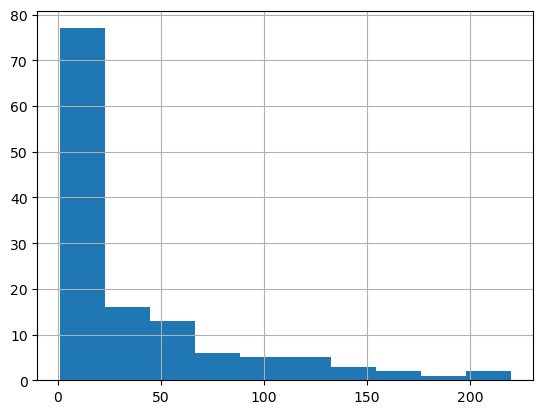

In [588]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
rice_consumption['co2_emission'].hist()
plt.show()

### **Measures of spread**

#### **Quartiles and quantiles**

Quantiles are a great way of summarizing numerical data since they can be used to measure center and spread, as well as to get a sense of where a data point stands in relation to the rest of the data set. For example, you might want to give a discount to the 10% most active users on a website.

In [589]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


Variance and standard deviation are two of the most common ways to measure the spread of a variable,

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


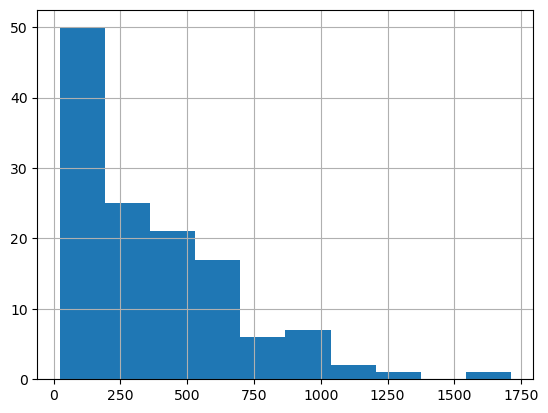

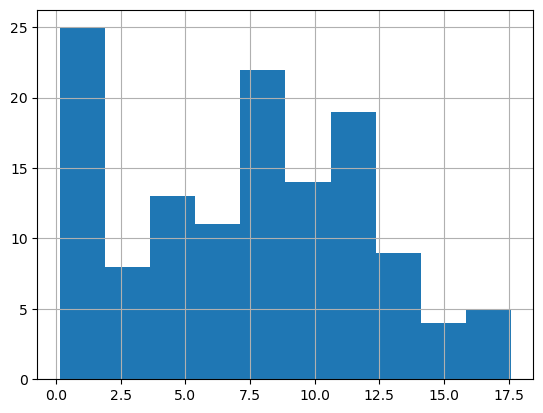

In [590]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
# Show plot
plt.show()

### **Finding outliers using IQR**

Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers.

IQR is also often used to find outliers. If a value is less than

\begin{align*}
Q1 - 1.5 \times IQR 
\end{align*}

or greater than 

\begin{align*}
Q3 + 1.5 \times IQR 
\end{align*}

<img src="https://www.statology.org/wp-content/uploads/2021/01/iqrOutlier1.png" alt="Beschreibung des Bildes" width="800" height="400">

In [591]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


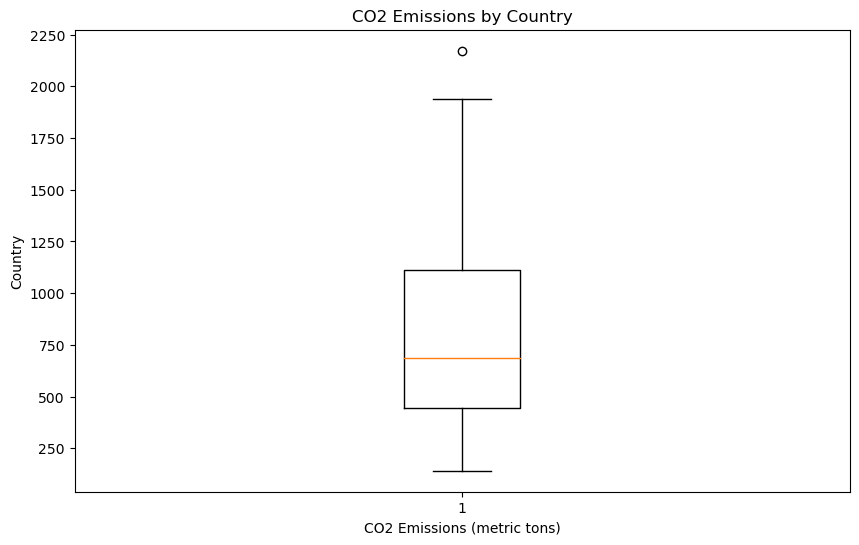

In [592]:
import matplotlib.pyplot as plt

# Create a boxplot using the emissions_by_country data
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(emissions_by_country)

# Add title and labels
ax.set_title('CO2 Emissions by Country')
ax.set_xlabel('CO2 Emissions (metric tons)')
ax.set_ylabel('Country')

plt.show()


In [593]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

In [594]:
# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [595]:
# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


### **1.2.Random Numbers and Probability**

For an Event E, the Probability that an Event occurs is given by:

\begin{align*}
P(E) &= \frac{\text{Number of results where E occurs}}{\text{Total number of results}}
\end{align*}

Example: A flip coin

\begin{align*}
P(E) &= \frac{1}{2} = 50 \%
\end{align*}

In [596]:
amir_deals = pd.read_csv('../datasets/amir_deals.csv', index_col=0)
amir_deals

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17
...,...,...,...,...,...
174,Product A,Current,Lost,5835.32,23
175,Product D,Current,Won,6377.50,12
176,Product D,Current,Won,3537.61,28
177,Product A,Current,Won,6448.07,34


In [597]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64


In [598]:
# Calculate probability of picking a deal with each product
probs = counts / amir_deals.shape[0]
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


In [599]:
# Set random seed
np.random.seed(24)

In [600]:
# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

       product   client status   amount  num_users
128  Product B  Current    Won  2070.25          7
149  Product D  Current    Won  3485.48         52
78   Product B  Current    Won  6252.30         27
105  Product D  Current    Won  4110.98         39
167  Product C      New   Lost  3779.86         11


In [601]:
# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

       product   client status   amount  num_users
134  Product D  Current    Won  5992.86         98
102  Product H  Current    Won  5116.34         63
111  Product B  Current    Won   696.88         44
50   Product B  Current    Won  3488.36         79
57   Product D  Current    Won  6820.84         42


#### **Random Variables**

A **random variable** is a variable whose numerical value depends on the outcome of a random phenomenon. So, its value is initially unknown, but it becomes known once the outcome of the random phenomenon is realized. We can define the random variable $X$ with possible values of $X=0$ or $X=1$. A particular value that $X$ can take on is denoted by $x$. 

A random variable can be **discrete** or **continouous**.

A **discrete random variable** $X$ has a limited, countable number of possible values $x_i$. For a **continuous random variable** $X$, the experiment has infinitely many possible outcomes $x_i$.

#### **Probability Distributions**

Generally speaking, the **probability density function** shows the probabilities for individual values of the random variable, while the **cumulative distribution function** sums up the probabilities for multiple values.

The probability density function of a discrete random variable is referred to as the **probability mass function**!

#### **PMF and CDF (Discrete Random Variable)**

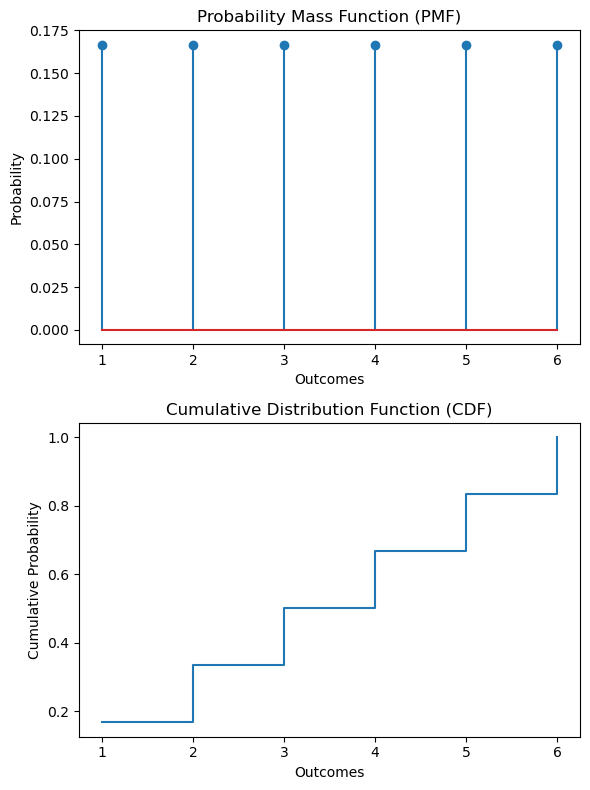

In [602]:
# Define a list of possible outcomes for the random variable
outcomes = [1, 2, 3, 4, 5, 6]

# Define the probabilities of each outcome (PMF)
pmf = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

# Calculate the cumulative probabilities (CDF)
cdf = np.cumsum(pmf)

# Plot the PMF and CDF using matplotlib
fig, ax = plt.subplots(2, 1, figsize=(6, 8))

ax[0].stem(outcomes, pmf)
ax[0].set_xlabel('Outcomes')
ax[0].set_ylabel('Probability')
ax[0].set_title('Probability Mass Function (PMF)')

ax[1].step(outcomes, cdf, where='post')
ax[1].set_xlabel('Outcomes')
ax[1].set_ylabel('Cumulative Probability')
ax[1].set_title('Cumulative Distribution Function (CDF)')

plt.tight_layout()
plt.show()

#### **PDF and CDF (Continuous Random Variable)**

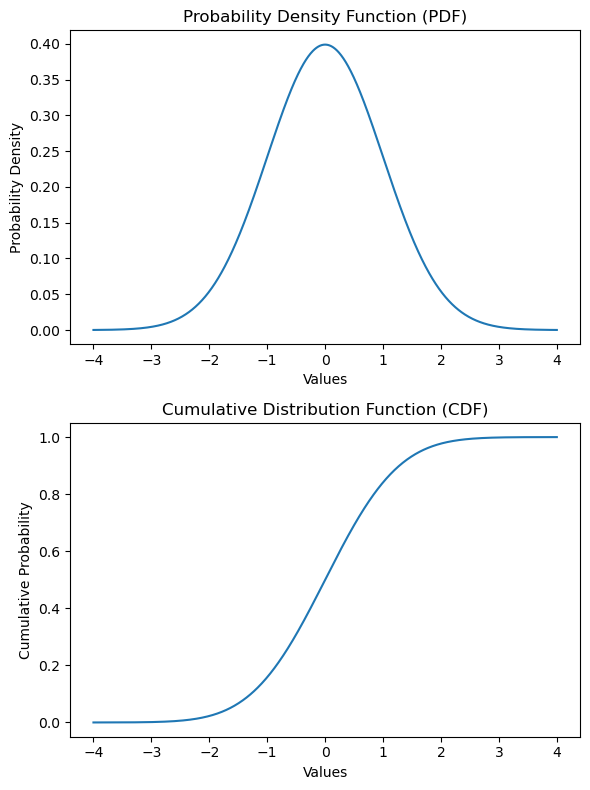

In [603]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the mean and standard deviation of the normal distribution
mu = 0
sigma = 1

# Create a normal distribution object using the mean and standard deviation
dist = norm(mu, sigma)

# Define the range of values to evaluate the PDF and CDF
x = np.linspace(-4, 4, 1000)

# Calculate the PDF and CDF values for each value in the range
pdf = dist.pdf(x)
cdf = dist.cdf(x)

# Plot the PDF and CDF using matplotlib
fig, ax = plt.subplots(2, 1, figsize=(6, 8))

ax[0].plot(x, pdf)
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Probability Density')
ax[0].set_title('Probability Density Function (PDF)')

ax[1].plot(x, cdf)
ax[1].set_xlabel('Values')
ax[1].set_ylabel('Cumulative Probability')
ax[1].set_title('Cumulative Distribution Function (CDF)')

plt.tight_layout()
plt.show()

### **1.3. Central Limit Theorem**

The Central Limit Theorem (CLT) is a statistical concept that describes the behavior of sample means when samples are drawn from any population with a finite mean and variance. The theorem states that, as the sample size increases, the distribution of the sample means approaches a normal distribution with a mean equal to the population mean and a variance equal to the population variance divided by the sample size.

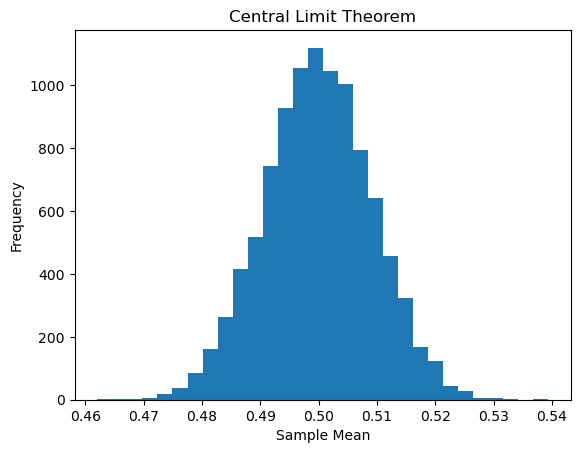

In [604]:
# Sample size
n = 1000

# Number of samples
num_samples = 10000

# Generate num_samples samples of size n from a uniform distribution
samples = np.random.uniform(0, 1, (num_samples, n))

# Calculate the mean of each sample
sample_means = np.mean(samples, axis=1)

# Plot a histogram of the sample means
plt.hist(sample_means, bins=30)
plt.title("Central Limit Theorem")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

### **1.4. Correlation and Experimental Design**

In [607]:
world_happiness = pd.read_csv('../datasets/world_happiness.csv', index_col=0)
world_happiness.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


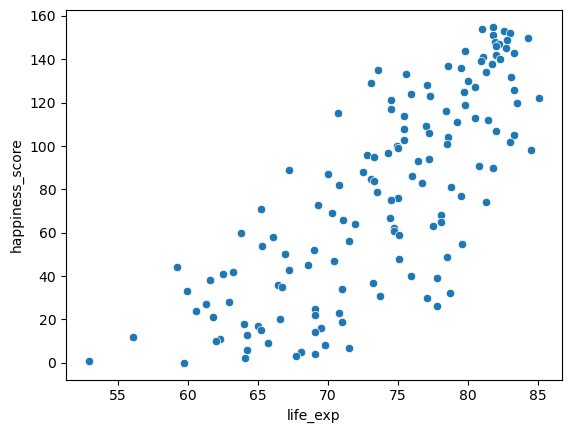

In [608]:
import seaborn as sns

# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x='life_exp', y='happiness_score', data=world_happiness)

# Show plot
plt.show()

$x$ = explanatory/independent variable

$y$ = response/dependent variable

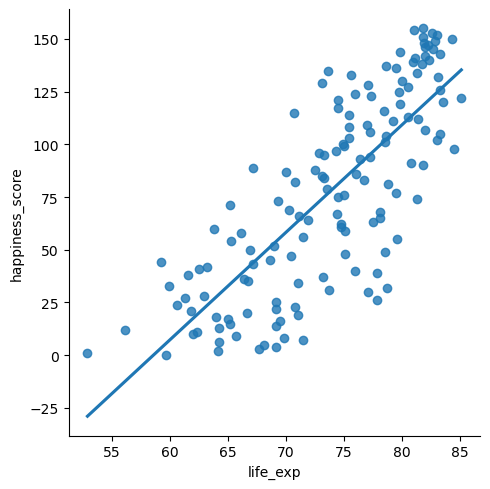

In [611]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)

# Show plot
plt.show()

The most common way to calculate the correlation is given by the **Pearson correlation coefficient**:

\begin{align*}
r_{XY} = \frac{(x_i-\bar{x})(y_i-\bar{y})}{\sigma_X \times \sigma_{Y}}
\end{align*}

In [614]:
# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

print(cor)

0.7802249053272062


**What can't correlation measure?**

While the correlation coefficient is a convenient way to quantify the strength of a relationship between two variables, it's far from perfect.

You'll explore one of the caveats of the correlation coefficient by examining the relationship between a country's GDP per capita (gdp_per_cap) and happiness score.

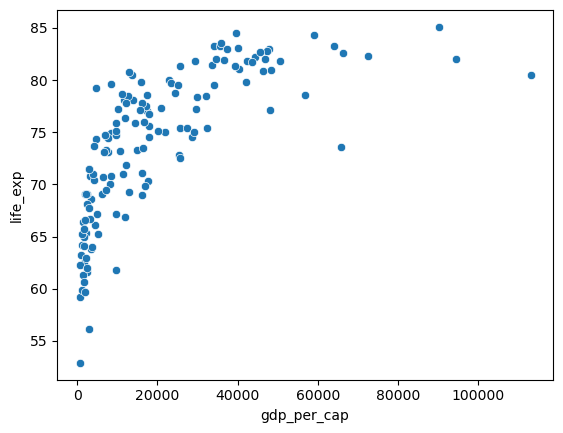

0.7019547642148014


In [616]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)

# Show plot
plt.show()
  
# Correlation between gdp_per_cap and life_exp
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])

print(cor)

**Correlation only measures linear relationships!**

### **Transforming variables**

When variables have **skewed distributions**, they often **require a transformation** in order to form a linear relationship with another variable so that correlation can be computed.

#### **Log-Transformation**

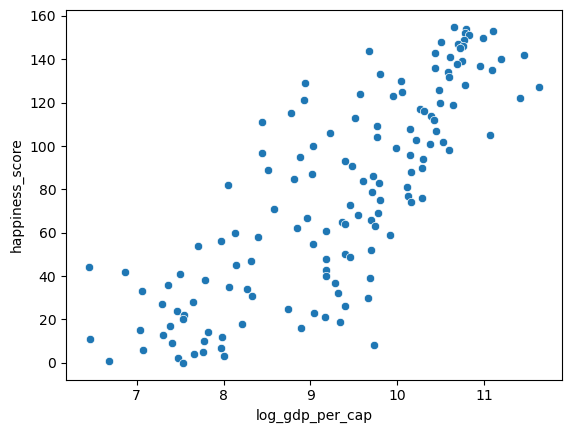

0.8043146004918291


In [619]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of happiness_score vs. log_gdp_per_cap
sns.scatterplot(x='log_gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)